# Библиотека Numpy

In [26]:
L=range(10)
%timeit [i**2 for i in L]

3.21 µs ± 178 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


In [2]:
import numpy as np
L=np.arange(10000)
%timeit L**2

7.26 µs ± 194 ns per loop (mean ± std. dev. of 7 runs, 100000 loops each)


### Основной объект - однородный массив ndarray
Его главные состовляющие:
* data - указатель в памяти на начало массива
* shape - размерности массива
* dtype - тип элементов массива
* stride - описание того, как считывать массив 

In [3]:
my_2d_array = np.arange(10).reshape((2, 5))

# Print out memory address
print(my_2d_array.data)

# Print out the shape of `my_array`
print(my_2d_array.shape)

# Print out the data type of `my_array`
print(my_2d_array.dtype)

# Print out the stride of `my_array`
print(my_2d_array.strides)

(2, 5)
int32
(20, 4)


### Способы задания массивов

In [4]:
# Create an array of ones
np.ones((3, 4))

# Create an array of zeros
np.zeros((2, 3, 4), dtype=np.int16)

# Create an array with random values
np.random.random((2, 2))

# Create an empty array
np.empty((3, 2))

# Create a full array
np.full((2, 2), 7)

# Create an array of evenly-spaced values
np.arange(10, 25, 5)

# Create an array of evenly-spaced values
np.linspace(0, 2, 9)

# Create a diagonal matrix
np.diag([1, 2, 3])

array([[1, 0, 0],
       [0, 2, 0],
       [0, 0, 3]])

#### Exercise 

Consider the vector [1, 2, 3, 4, 5], how to build a new vector with 3 consecutive zeros interleaved between each value?


### Индексация элементов массива

In [10]:
a = np.arange(10)
print(a[0], a[[3, -1]], a[3:], a[6: -2], a[:-3])

0 [3 9] [3 4 5 6 7 8 9] [6 7] [0 1 2 3 4 5 6]


9

In [12]:
a = np.diag(np.arange(3))
print(a[1, 2], a[1])

0 [0 1 0]


In [7]:
a = np.arange(10, 20)
mask = a % 3 == 0 
print(mask) 
print(a[mask])

a[mask] = -1
print(a)

[False False  True False False  True False False  True False]
[12 15 18]
[10 11 -1 13 14 -1 16 17 -1 19]


#### Exercise

Create a 8x8 matrix and fill it with a checkerboard pattern.

### Арифметические операции выполняются поэлементно

In [8]:
a = np.arange(1, 4)
print(a + 1)
print(2**a)
print(a**2)

[2 3 4]
[2 4 8]
[1 4 9]


In [20]:
a=np.arange(10).reshape((2, 5))

print(np.mean(a), np.mean(a, axis=1))

4.5 [2. 7.]


array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

### Функции над массивами

In [9]:
a = np.array([1, 2, 3])
print(np.sum(a), np.sin(a), np.mean(a), np.std(a))

a=np.arange(10).reshape((2, 5))
print(np.mean(a), np.mean(a, axis=0))

a = np.zeros((100, 100)) 
print(np.any(a != 0) , np.all(a == 0))

a = np.random.randn(5)
print(np.min(a), np.sort(a), np.argsort(a))

6 [0.84147098 0.90929743 0.14112001] 2.0 0.816496580927726
4.5 [2.5 3.5 4.5 5.5 6.5]
False True
-1.4515517229193138 [-1.45155172  0.05098787  0.06320243  0.80227334  1.64337234] [4 3 2 0 1]


#### Exercise

Generate a random 5x5 matrix. Subtract the mean of each row of a matrix.

### Сложение массивов

In [10]:
a = np.floor(10 * np.random.rand(2, 2))
print(a)

b = np.floor(10 * np.random.rand(2, 2))
print(b)

print('\n--Concatenate a and b--\n')

print(np.vstack((a, b))) # сложение по вертикали
print(np.hstack((a, b))) # сложение по горизонтали

[[8. 0.]
 [1. 5.]]
[[5. 2.]
 [8. 3.]]

--Concatenate a and b--

[[8. 0.]
 [1. 5.]
 [5. 2.]
 [8. 3.]]
[[8. 0. 5. 2.]
 [1. 5. 8. 3.]]


### Array broadcasting
Схема ниже показывает, как происходит скложение массивов. Если shape у массивов не совпадают, то массив меньшей размерности "естественным образом" дополняется до большей размерности.

![title](http://www.scipy-lectures.org/_images/numpy_broadcasting.png)

In [22]:
x = np.ones((3, 4))
y = np.random.rand(4)

# Add `x` and `y`. Note that `x` and `y` have different shapes.
print(x.shape, y.shape)
print(x + y)

(3, 4) (4,)
[[1.51994437 1.04259351 1.8304829  1.97672686]
 [1.51994437 1.04259351 1.8304829  1.97672686]
 [1.51994437 1.04259351 1.8304829  1.97672686]]


#### Exercise

Создайте масив first_column из четырех элементов: 0, 10, 20, 30. Затем создайте двухмерный массив 4x5, в котором первый столбец - массив first_column, а каждый элемент каждой строки, начиная со второго,  больше предыдущего элемента этой же строки на 1.

### Let's practice: k-means clustering algorithm

<img src="https://www.brandidea.com/images/datascience/kmeansxmeans.jpg" style="width: 60%;"/>


Get dataset on old faithful geyser eruptions:

In [28]:
data = np.loadtxt('http://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat', skiprows=26)[:, 1:]

Visualize data:

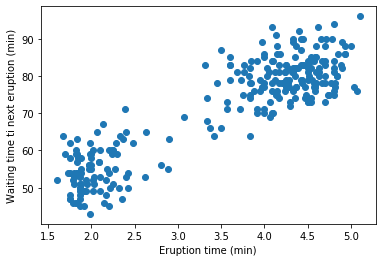

In [29]:
import matplotlib.pyplot as plt

plt.scatter(*data.T)
plt.xlabel('Eruption time (min)')
plt.ylabel('Waiting time ti next eruption (min)')
plt.show()

Standardize data to zero mean and unit std:

In [30]:
data = ?

Plot standardized data:

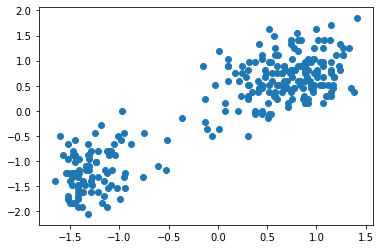

In [31]:
plt.scatter(*data.T)
plt.show()

Initial guess on centroid locations:

In [36]:
centroids = np.random.uniform(-2, 2, 4).reshape((2, 2))

Calculate the Euclidean distance between each point in ```data``` and each point in ```centroids```:

In [ ]:
dist = np.linalg.norm(?)

Get label (index number) of each closest centroid from the ```dist``` array:

In [ ]:
np.argmin(dist, axis=?)

Put all this together in functional form:

In [33]:
def get_labels(pts, centroids):
    '''Get index number of closest centroid to each item in X

    Parameters
    ----------
    pts : ndarray
        Array of points.
    centroids : ndarray
        Array of centroids.

    Returns
    -------
    res : ndarray
        Indices of closest centroids for each item in X.
    '''
    return ?

Get labels according to current centroids:

In [38]:
labels = get_labels(data, centroids)

Plot predicted classes. Circles show data points distribution, stars show centroids location:

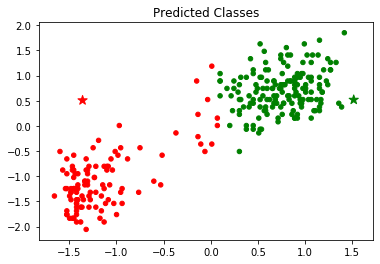

In [43]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.scatter(*data.T, c=np.where(labels, "green", "red"), s=20)
plt.scatter(*centroids.T, c=["red", "green"], s=95, marker='*')
plt.title('Predicted Classes')
plt.show()

It was only one step in K-Means clustering. In the homework you will be asked to implement iterative procedure of K-Means clustering.

### Read more

[https://www.scipy-lectures.org/intro/numpy/array_object.html](https://www.scipy-lectures.org/intro/numpy/array_object.html)

[https://www.datacamp.com/community/tutorials/python-numpy-tutorial](https://www.datacamp.com/community/tutorials/python-numpy-tutorial)

[https://docs.scipy.org/doc/numpy/user/quickstart.html](https://docs.scipy.org/doc/numpy/user/quickstart.html)

[https://home.deib.polimi.it/matteucc/Clustering/tutorial_html/kmeans.html](https://home.deib.polimi.it/matteucc/Clustering/tutorial_html/kmeans.html)

### Homework

1. Создайте двумерный массив 10x3, заполненный случайными значениями. В каждой строке выберите значение, наиболее близкое к 0.5.

1. Создайте двумерный массив 6x6, заполненный случайными значениями. Затем сумму по каждой строке поделите на минимальный элемент из столбца с тем же индексом.

2. На примере массива x = np.array([6, 2, 0, 3, 0, 0, 5, 7, 0]) найдите максимальный элемент в массиве среди элементов, перед которыми стоит ноль.

3. Пусть заданы два массива x = np.ones(10) и i = np.array([0, 1, 2, 3, 5, 5, 5, 8]). Прибавьте единицу к тем элементам массива x, индексы которых указаны в массиве i. В случае, если некоторый индекс встретился в массиве i несколько раз, прибавьте к соответствующему элементу массива x число вхождений данного индекса в массив i.

4. По заданному двумерному массиву размера NxN постройте словарь, ключи которого - индексы диагоналей, параллельных побочной (нумерация начинается с 0), а значения - списки элементов исходного массива, лежащих на соответствующих диагоналях.
Решите задачу на примере массива a = np.arange(16).reshape(4, 4), в результате должен получиться словарь
{0: [0],
 1: [1, 4],
 2: [2, 5, 8],
 3: [3, 6, 9, 12],
 4: [7, 10, 13],
 5: [11, 14],
 6: [15]}.
 


In [ ]:
def Breadth_ﬁrst(graph,node):
    
    
    
    
    
    
    
    return new_graph,level